### Fitting distributions

In [1067]:
# Iterate over each group
for name, group in combined_df.groupby(['Zonkod', 'Tidpunkt']):
    print("Fitting distributions for group:", name)
    
    # Extract data from the group
    data = group['Tid_i_minuter']
    
    # Remove non-finite values
    data = data.dropna()  # Remove NaN values
    data = data[np.isfinite(data)]  # Remove infinite values
    
    if len(data) == 0:
        print("No valid data for fitting distributions.")
        continue
    
    # Fit lognormal distribution
    if 'lognorm' in distributions:
        sigma, loc, scale = stats.lognorm.fit(data)
        print("Lognormal distribution parameters:", sigma, loc, scale)
    
    # Fit gamma distribution
    if 'gamma' in distributions:
        shape, loc, scale = stats.gamma.fit(data)
        print("Gamma distribution parameters:", shape, loc, scale)
    
    # Fit beta distribution
    if 'beta' in distributions:
        a, b, loc, scale = stats.beta.fit(data)
        print("Beta distribution parameters:", a, b, loc, scale)


Fitting distributions for group: ('0', 'night')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'morning')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'lunch')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'morning_sat')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'afternoon')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'evening')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'sunday')
No valid data for fitting distributions.
Fitting distributions for group: ('0', 'afternoon_sat')
No valid data for fitting distributions.
Fitting distributions for group: ('1001', 'night')
No valid data for fitting distributions.
Fitting distributions for group: ('1001', 'morning')
No valid data for fitting distributions.
Fitting distributions for group: ('1001', 'lunch')
No valid data for fitting di

FitError: Optimization converged to parameters that are outside the range allowed by the distribution.

In [1068]:
# Define lists to store the evaluation results for each distribution
lognormal_results = []
gamma_results = []
beta_results = []

# Loop through each group of data
for group_name, group_data in combined_df.groupby(['Zonkod', 'Tidpunkt']):
    print(f"Evaluating distribution for group: {group_name}")
    
    # Extract data for the current group
    data = group_data['Tid_i_minuter']
    
    # Check if the data is valid for fitting distributions
    if len(data) > 1:
        # Fit lognormal distribution if valid data is available
        try:
            sigma, loc, scale = stats.lognorm.fit(data)
            lognormal_test = stats.kstest(data, stats.lognorm.cdf, args=(sigma, loc, scale))
            lognormal_results.append((group_name, sigma, loc, scale, lognormal_test))
        except:
            print("No valid data for lognormal distribution.")
        
        # Fit gamma distribution if valid data is available
        try:
            shape, loc, scale = stats.gamma.fit(data)
            gamma_test = stats.kstest(data, stats.gamma.cdf, args=(shape, loc, scale))
            gamma_results.append((group_name, shape, loc, scale, gamma_test))
        except:
            print("No valid data for gamma distribution.")
        
        # Fit beta distribution if valid data is available
        try:
            a, b, loc, scale = stats.beta.fit(data)
            beta_test = stats.kstest(data, stats.beta.cdf, args=(a, b, loc, scale))
            beta_results.append((group_name, a, b, loc, scale, beta_test))
        except:
            print("No valid data for beta distribution.")
    else:
        print("Insufficient data for fitting distributions.")
if lognormal_test.statistic < gamma_test.statistic and lognormal_test.statistic < beta_test.statistic:
    print("Lognormal distribution is the best fit.")
elif gamma_test.statistic < lognormal_test.statistic and gamma_test.statistic < beta_test.statistic:
    print("Gamma distribution is the best fit.")
else:
    print("Beta distribution is the best fit.")

Evaluating distribution for group: ('0', 'night')
No valid data for lognormal distribution.
No valid data for gamma distribution.
No valid data for beta distribution.
Evaluating distribution for group: ('0', 'morning')
No valid data for lognormal distribution.
No valid data for gamma distribution.
No valid data for beta distribution.
Evaluating distribution for group: ('0', 'lunch')
No valid data for lognormal distribution.
No valid data for gamma distribution.
No valid data for beta distribution.
Evaluating distribution for group: ('0', 'morning_sat')
No valid data for lognormal distribution.
No valid data for gamma distribution.
No valid data for beta distribution.
Evaluating distribution for group: ('0', 'afternoon')
No valid data for lognormal distribution.
No valid data for gamma distribution.
No valid data for beta distribution.
Evaluating distribution for group: ('0', 'evening')
No valid data for lognormal distribution.
No valid data for gamma distribution.
No valid data for bet

In [1070]:
def fill_missing_with_lognormal(group):
    # Filter out missing values
    observed_data = group.dropna()
    
    if len(observed_data) < 2:
        # Not enough data to fit a distribution
        return group
    
    # Fit a lognormal distribution to the observed data
    sigma, loc, scale = lognorm.fit(observed_data)
    
    # Generate random samples from the fitted distribution
    num_missing = group.isnull().sum()
    generated_samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_missing)
    
    # Replace missing values with generated samples
    group[group.isnull()] = generated_samples
    
    return group

# Apply the function to each group defined by ('Zonkod', 'Tidpunkt')
combined_df_filled = combined_df.groupby(['Zonkod', 'Tidpunkt']).apply(fill_missing_with_lognormal)
combined_df.head()

,Zonkod,Tid_i_minuter,Start,Stopp,Belopp,Source,Parkeringsomrade,Transaktions_ID,P-avgift_exkl._Moms,P-avgift_Moms,...,Registreringsnummer,Kontrakt,Status,Biljettyp,Terminal_ID,Betalenhet_Namn,Nod,Maskat_PAN,Biljettnummer,Tidpunkt
0,42040,836.700000,2023-11-30 10:07:18,2023-12-01 00:04:00,59.42,EasyPark,Idrottens hus/Ishallen,1528524158,47.536,11.884,...,UGR040,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lunch
1,42036,414.250000,2023-11-30 17:25:45,2023-12-01 00:20:00,11.67,EasyPark,Hamntorget,1529472222,9.336,2.334,...,DGJ970,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afternoon
2,42004,439.366667,2023-11-30 17:06:20,2023-12-01 00:25:42,10.80,EasyPark,Billeplatsen,1529431361,8.640,2.160,...,BFY883,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,afternoon
3,42027,0.166667,2023-12-01 00:34:08,2023-12-01 00:34:18,0.00,EasyPark,GA Torg,1529752222,0.000,0.000,...,OZR297,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,night
4,42029,1.583333,2023-12-01 00:50:13,2023-12-01 00:51:48,0.00,EasyPark,Gasverksgatan B,1529752960,0.000,0.000,...,YFO272,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN,night


#### Filling each time group missing values with random values based on standard deviation in this group

In [ ]:
# # Define a function to fill missing values with random numbers based on standard deviation within each group
# def fill_missing_with_random(df, group_columns, value_column):
#     # Calculate standard deviation for each group
#     std_by_group = df.groupby(group_columns)[value_column].std()
    
#     # Iterate over each group
#     for group, std in std_by_group.items():
#         # Get the indices of missing values within the group
#         missing_indices = df[(df[group_columns[0]] == group[0]) & (df[group_columns[1]] == group[1]) & df[value_column].isnull()].index
        
#         # Generate random numbers based on the standard deviation of the group
#         random_values = np.random.normal(loc=df[(df[group_columns[0]] == group[0]) & (df[group_columns[1]] == group[1])][value_column].mean(), 
#                                          scale=std,
#                                          size=len(missing_indices))
#         # Replace missing values with random numbers within the group
#         df.loc[missing_indices, value_column] = random_values

# # Fill missing values with random numbers based on standard deviation within each group
# fill_missing_with_random(combined_df, ['Zonkod', 'Tidpunkt'], 'Tid_i_minuter')

#### Creating column for the type of parking

In [1076]:
# Define the conditions for each category
conditions = [
    (combined_df['Tid_i_minuter'] <= 4320),
    (combined_df['Tid_i_minuter'] > 4320) & (combined_df['Tid_i_minuter'] <= 10080),
    (combined_df['Tid_i_minuter'] > 10080)
]

# Define the corresponding values for each category
categories = ['Short_term', 'Week', 'Long_term']

# Create the new column 'Park_type' based on the conditions and values
combined_df['Park_type'] = np.select(conditions, categories)

combined_df = combined_df.reindex(columns=['Zonkod', 'Tid_i_minuter', 'Start', 'Stopp', 'Belopp', 'Park_type','Tidpunkt', 'Day', 'Month', 'Source',
       'Parkeringsomrade', 'Transaktions_ID', 'P-avgift_exkl._Moms',
       'P-avgift_Moms', 'P-avgift_inkl._Moms', 'Arvode_%', 'Arvode_exkl._Moms',
       'Arvode_Moms', 'Arvode_inkl._Moms', 'Registreringsnummer', 'Kontrakt',
       'Status', 'Biljettyp', 'Terminal_ID', 'Betalenhet_Namn', 'Nod',
       'Maskat_PAN', 'Biljettnummer'])


# Display the DataFrame to verify the changes
combined_df.head()

,Zonkod,Tid_i_minuter,Start,Stopp,Belopp,Park_type,Tidpunkt,Day,Month,Source,...,Arvode_inkl._Moms,Registreringsnummer,Kontrakt,Status,Biljettyp,Terminal_ID,Betalenhet_Namn,Nod,Maskat_PAN,Biljettnummer
0,42040,836.700000,2023-11-30 10:07:18,2023-12-01 00:04:00,59.42,Short_term,lunch,Thursday,November,EasyPark,...,0.0,UGR040,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42036,414.250000,2023-11-30 17:25:45,2023-12-01 00:20:00,11.67,Short_term,afternoon,Thursday,November,EasyPark,...,0.0,DGJ970,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42004,439.366667,2023-11-30 17:06:20,2023-12-01 00:25:42,10.80,Short_term,afternoon,Thursday,November,EasyPark,...,0.0,BFY883,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42027,0.166667,2023-12-01 00:34:08,2023-12-01 00:34:18,0.00,Short_term,night,Friday,December,EasyPark,...,0.0,OZR297,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42029,1.583333,2023-12-01 00:50:13,2023-12-01 00:51:48,0.00,Short_term,night,Friday,December,EasyPark,...,0.0,YFO272,PO-442-Base rule,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Showing the number of purchases per Month

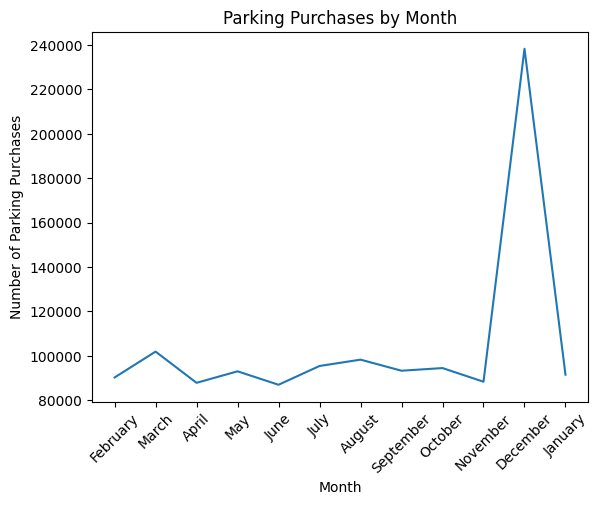

In [1077]:
# Define the order of months
month_order = ['February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December', 'January']

# Convert 'Month' column to categorical data with the specified order
combined_df['Month'] = pd.Categorical(combined_df['Month'], categories=month_order, ordered=True)

# Calculate parking purchases by month
parking_counts = combined_df['Month'].value_counts()

# Sort the counts by month order
parking_counts = parking_counts.sort_index()

# Create a line plot
sns.lineplot(data=parking_counts)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Parking Purchases')
plt.title('Parking Purchases by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Showing the number of purchases per weekday

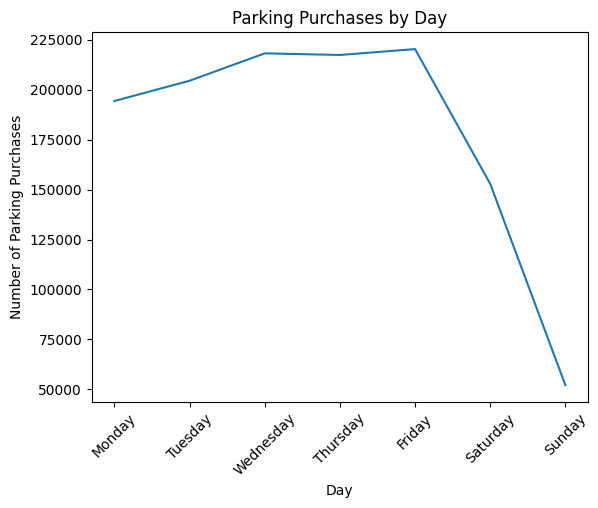

In [1078]:
# Define the order of months
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Month' column to categorical data with the specified order
combined_df['Day'] = pd.Categorical(combined_df['Day'], categories=day_order, ordered=True)

# Calculate parking purchases by day
parking_counts_1 = combined_df['Day'].value_counts()

# Sort the counts by month order
parking_counts_1 = parking_counts_1.sort_index()

# Create a line plot
sns.lineplot(data=parking_counts_1)

# Set plot labels and title
plt.xlabel('Day')
plt.ylabel('Number of Parking Purchases')
plt.title('Parking Purchases by Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Average parking time by Month

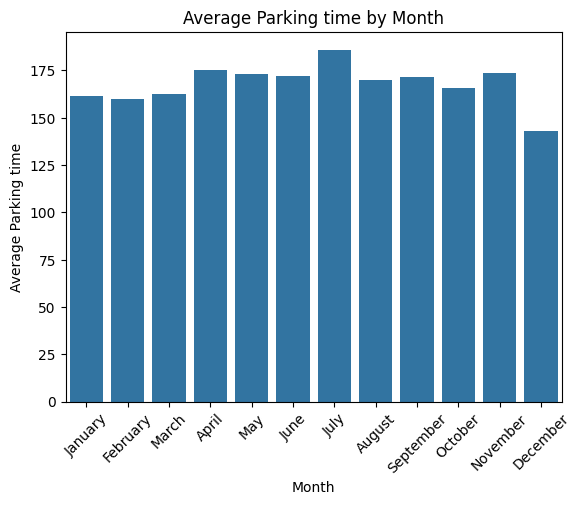

In [1079]:
# Calculate average 'Tid_i_minuter' by month
avg_tid_i_minuter = combined_df.groupby('Month')['Tid_i_minuter'].mean().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical data with the specified order
avg_tid_i_minuter['Month'] = pd.Categorical(avg_tid_i_minuter['Month'], categories=month_order, ordered=True)

# Create a bar plot for average 'Tid_i_minuter' by month
sns.barplot(data=avg_tid_i_minuter, x='Month', y='Tid_i_minuter')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Parking time')
plt.title('Average Parking time by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Sum of parking time by Month

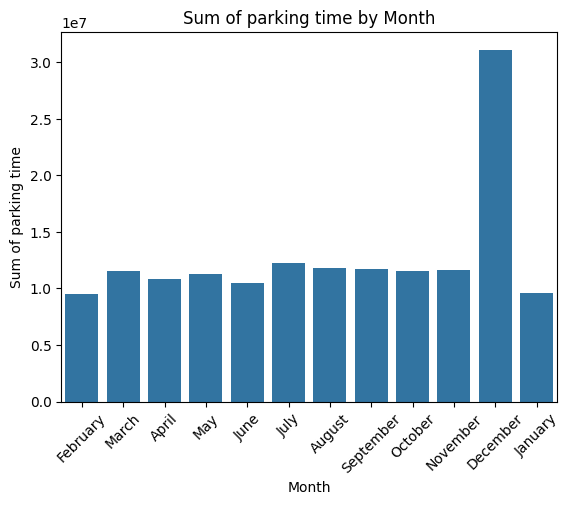

In [1080]:
# Group the DataFrame by 'Month' and calculate the sum of 'Tid_i_minuter'
sum_tid_i_minuter_by_month = combined_df.groupby('Month')['Tid_i_minuter'].sum().reset_index()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a bar plot for average 'Tid_i_minuter' by month
sns.barplot(data=sum_tid_i_minuter_by_month, x='Month', y='Tid_i_minuter')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Sum of parking time')
plt.title('Sum of parking time by Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Number purchases of week parking by Zonkod

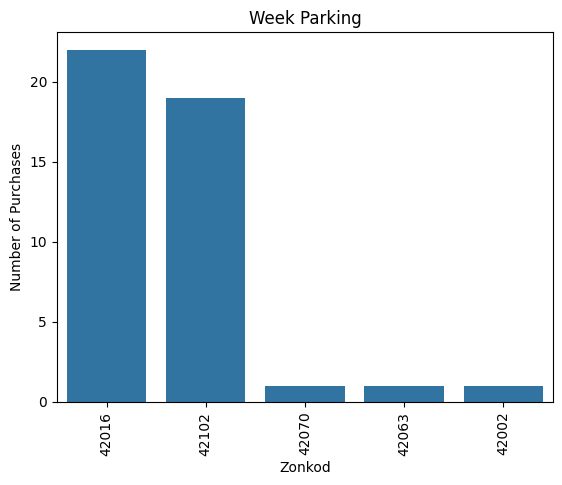

In [1081]:
# Filter the DataFrame for 'Tid_i_minuter' values from 4320 to 10080
filtered_df = combined_df[combined_df['Park_type'] == 'Week']

# Count the number of purchases by 'Zonkod'
purchases_by_zonkod = filtered_df['Zonkod'].value_counts().reset_index()
purchases_by_zonkod.columns = ['Zonkod', 'Number of Purchases']

# Create a bar plot for number of purchases by Zonkod
sns.barplot(data=purchases_by_zonkod, x='Zonkod', y='Number of Purchases')

# Set plot labels and title
plt.xlabel('Zonkod')
plt.ylabel('Number of Purchases')
plt.title('Week Parking')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Number purchases of long-term parking by Zonkod

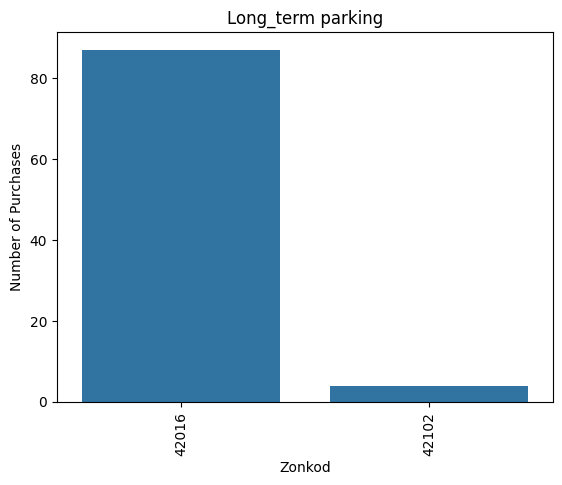

In [1082]:
# Filter the DataFrame for 'Tid_i_minuter' values from 4320 to 10080
filtered_df_ = combined_df[combined_df['Park_type'] == 'Long_term']

# Count the number of purchases by 'Zonkod'
purchases_by_zonkod = filtered_df_['Zonkod'].value_counts().reset_index()
purchases_by_zonkod.columns = ['Zonkod', 'Number of Purchases']

# Create a bar plot for number of purchases by Zonkod
sns.barplot(data=purchases_by_zonkod, x='Zonkod', y='Number of Purchases')

# Set plot labels and title
plt.xlabel('Zonkod')
plt.ylabel('Number of Purchases')
plt.title('Long_term parking')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### Showing short-term parking, numbers of purchases

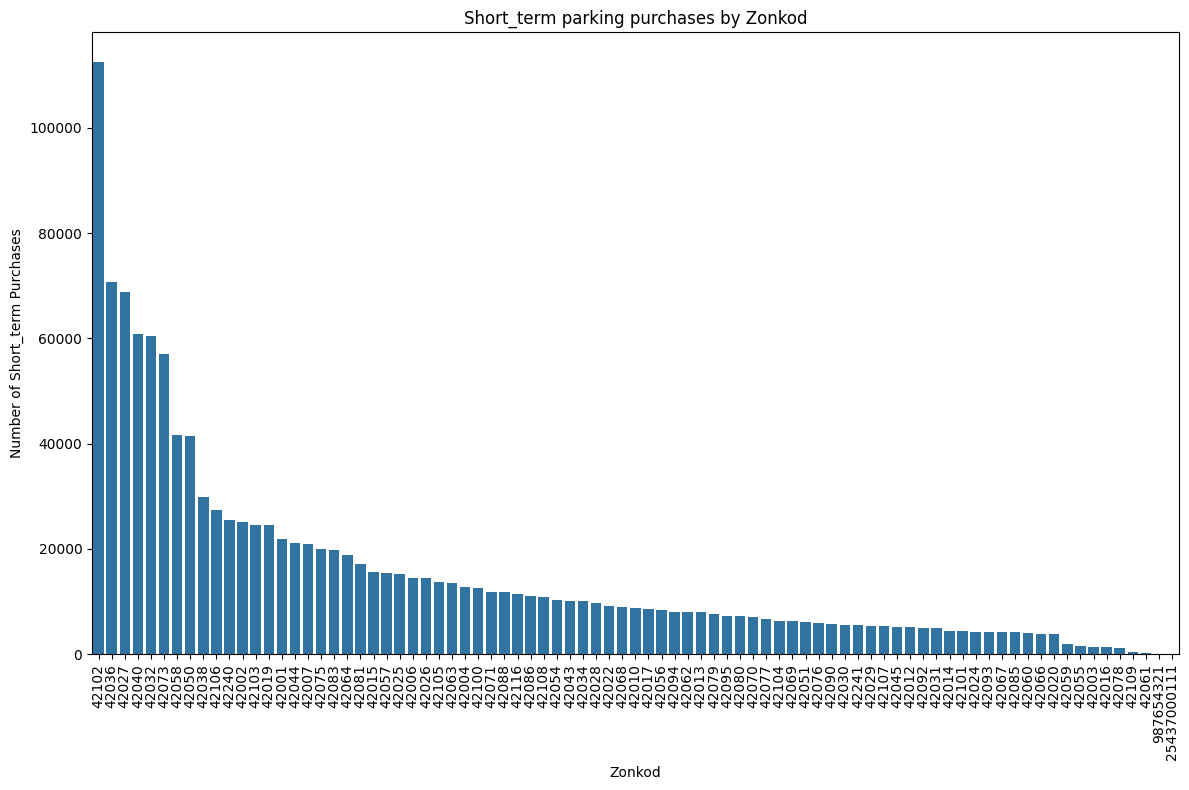

In [768]:
# Filter the DataFrame for 'Short_term' category in 'Park_type' column
short_term_data = combined_df[combined_df['Park_type'] == 'Short_term']

# Count the number of purchases for each 'Zonkod'
short_term_counts = short_term_data['Zonkod'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.barplot(x=short_term_counts.index, y=short_term_counts.values)

# Set plot labels and title
plt.xlabel('Zonkod')
plt.ylabel('Number of Short_term Purchases')
plt.title('Short_term parking purchases by Zonkod')
plt.xticks(rotation=90, ha='center', va='top')  # Rotate x-axis labels vertically
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### Top 10 short-term

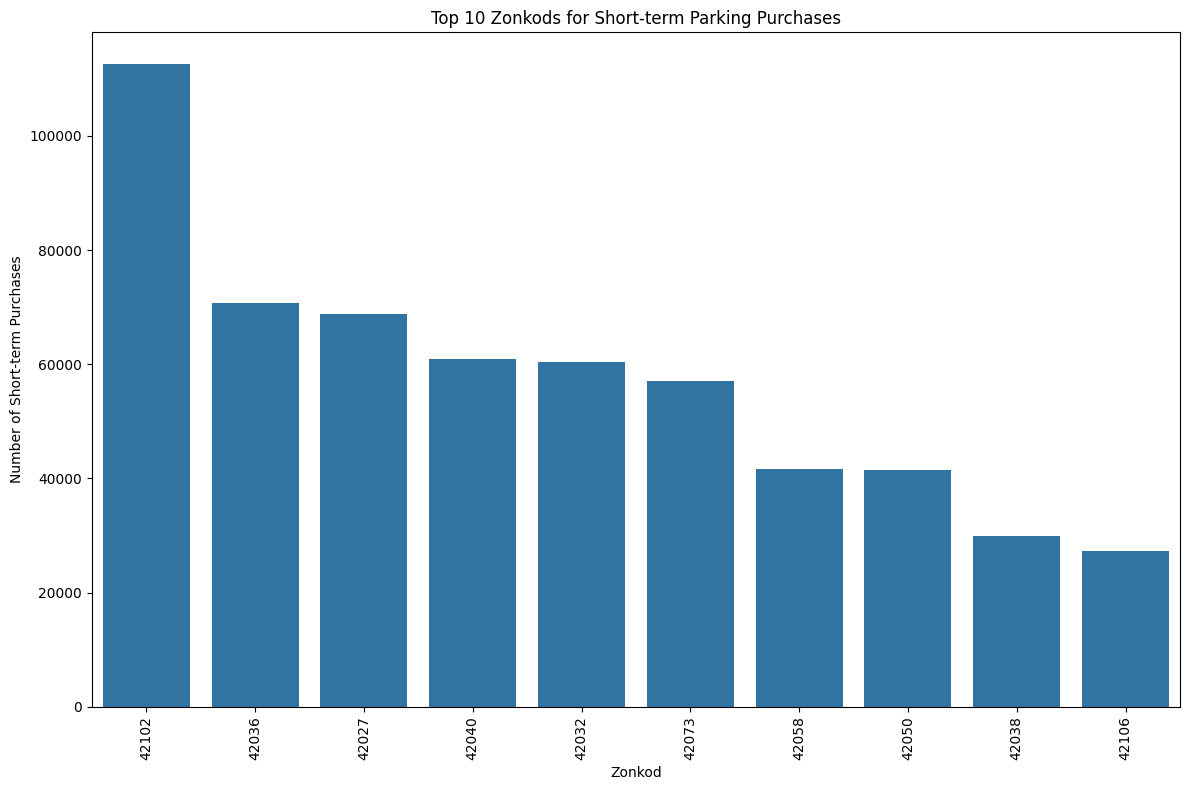

In [769]:
# Count the number of short-term purchases for each Zonkod
short_term_counts = short_term_data['Zonkod'].value_counts()

# Sort the Zonkods by the number of short-term purchases and select the top 10
top_10_zonkods = short_term_counts.sort_values(ascending=False).head(10)

# Plot the bar chart for the top 10 Zonkods
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.barplot(x=top_10_zonkods.index, y=top_10_zonkods.values)

# Set plot labels and title
plt.xlabel('Zonkod')
plt.ylabel('Number of Short-term Purchases')
plt.title('Top 10 Zonkods for Short-term Parking Purchases')
plt.xticks(rotation=90, ha='center', va='top')  # Rotate x-axis labels vertically
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [770]:
park_types = combined_df['Park_type'].unique()
print(park_types)

['Short_term' 'Week' 'Long_term' '0']


#### Showing the number of purchases for Week and Long-term

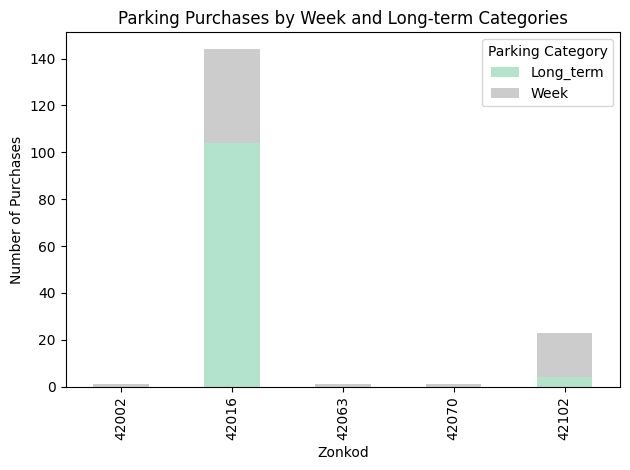

In [771]:
# Filter the DataFrame for 'Week' and 'Long_term' categories
filtered_combined_df = combined_df[combined_df['Park_type'].isin(['Week', 'Long_term'])]

# Group the filtered DataFrame by 'Zonkod' and count the number of observations in each group
purchase_counts = filtered_combined_df.groupby(['Zonkod', 'Park_type']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = purchase_counts.plot(kind='bar', stacked=True, colormap='Pastel2')

# Set plot labels and title
plt.xlabel('Zonkod')
plt.ylabel('Number of Purchases')
plt.title('Parking Purchases by Week and Long-term Categories')

# Create a legend with labels from purchase_counts columns
legend_labels = purchase_counts.columns.tolist()
plt.legend(legend_labels, title='Parking Category')

plt.tight_layout()
plt.show()